# Asteroids Classification

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tensorflow import keras

In [2]:
data = pd.read_csv('nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
pd.options.display.max_columns = None

In [4]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
# Removing IDs
data.drop(['Neo Reference ID','Name'],axis=1,inplace=True)

In [6]:
# Maping bool into int
data['Hazardous'] = data['Hazardous'].map({True:1,False:0})

In [7]:
data['Orbiting Body'].unique()

array(['Earth'], dtype=object)

In [8]:
data['Equinox'].unique()

array(['J2000'], dtype=object)

In [9]:
data.drop(['Orbiting Body','Equinox','Orbit ID'],axis=1,inplace=True)

In [10]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


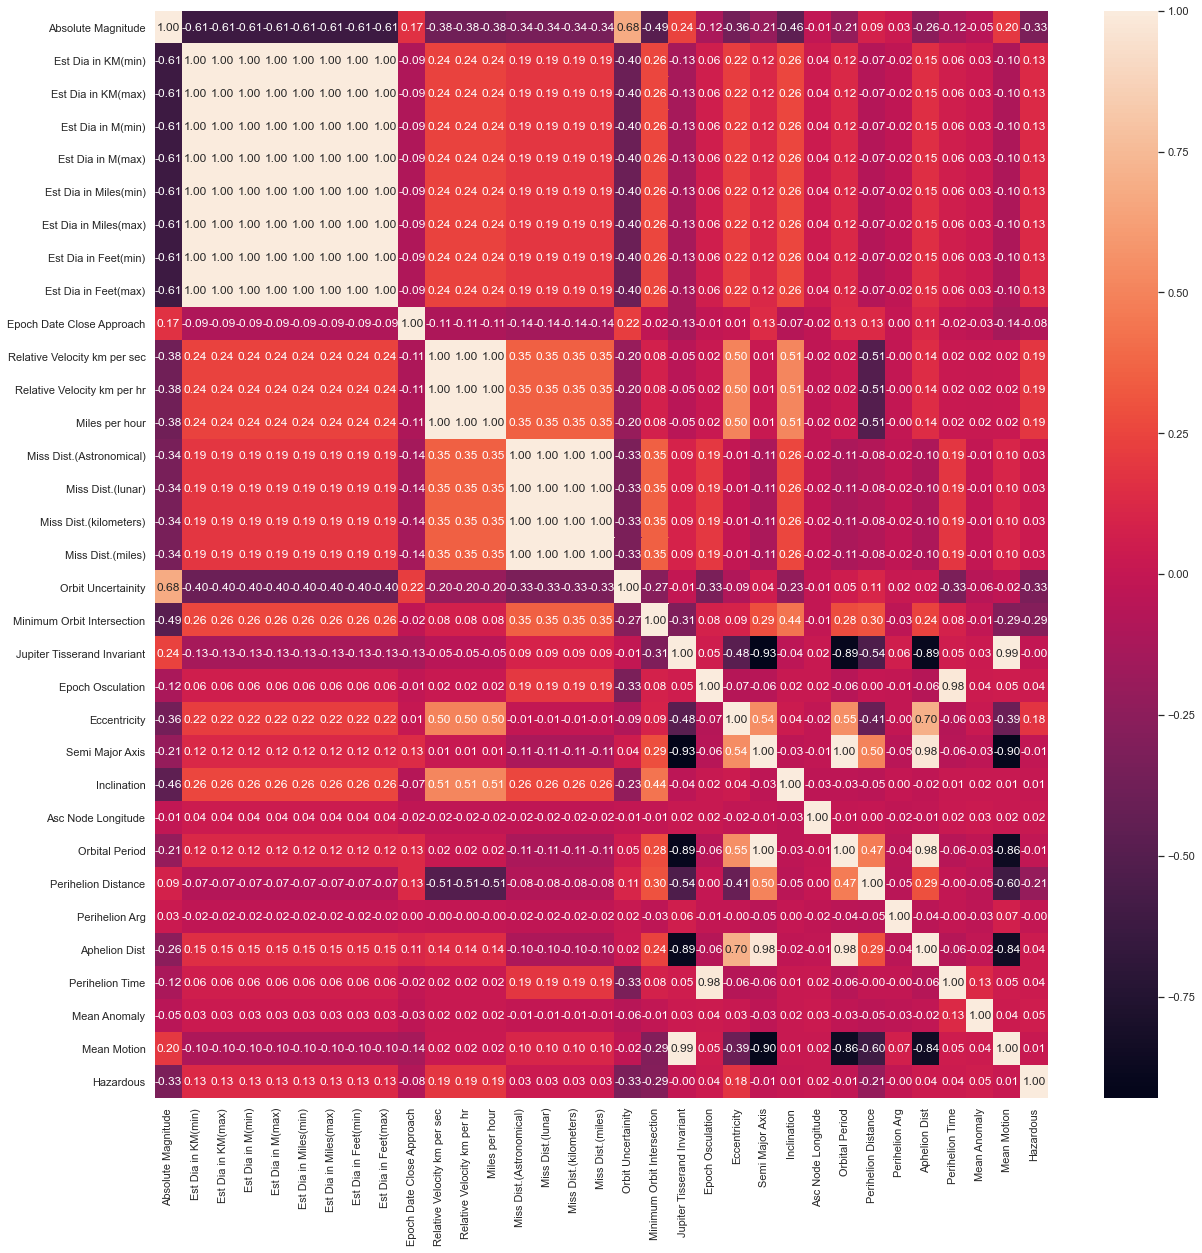

In [11]:
# Taking a look at the correlation
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.2f',ax=ax);

In [12]:
data.columns.values

array(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)',
       'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis',
       'Inclination', 'Asc Node Longitude', 'Orbital Period',
       'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',
       'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype=object)

In [13]:
checkpoint1 = data.copy()

In [14]:
# Removing repetitive variables in different metrics causing multi-collinearity 
data.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
           'Est Dia in Miles(max)', 'Est Dia in Feet(min)',
           'Est Dia in Feet(max)','Relative Velocity km per hr', 'Miles per hour',
           'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)',
           ],axis=1,inplace=True)

In [15]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,1995-01-01,788947200000,6.115834,62753692.0,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,1995-01-01,788947200000,18.113985,57298148.0,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,1995-01-08,789552000000,7.590711,7622911.5,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,1995-01-15,790156800000,11.173874,42683616.0,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,1995-01-15,790156800000,9.840831,61010824.0,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [16]:
# Removing Date
data.drop('Close Approach Date',axis=1,inplace=True)

In [17]:
# Removing Date
data.drop('Orbit Determination Date', axis=1, inplace=True)

In [18]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,788947200000,6.115834,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,788947200000,18.113985,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,789552000000,7.590711,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,790156800000,11.173874,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,790156800000,9.840831,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [19]:
# Finding best features
from sklearn.feature_selection import SelectKBest,chi2
best = SelectKBest(score_func=chi2,k='all')
best.fit(data.drop('Hazardous',axis=1),data.Hazardous)

table = pd.DataFrame()
table['Features'] = data.drop('Hazardous',axis=1).columns.values
table['Score'] = best.scores_
table['p-Values'] = best.pvalues_

table.sort_values(by=['Score'],ascending=False)

,Features,Score,p-Values
3,Epoch Date Close Approach,9.737450e+11,0.000000e+00
5,Miss Dist.(kilometers),6.094849e+07,0.000000e+00
6,Orbit Uncertainity,1.364313e+03,1.194690e-298
19,Mean Anomaly,8.769334e+02,1.014600e-192
4,Relative Velocity km per sec,6.574870e+02,5.258454e-145
0,Absolute Magnitude,1.863683e+02,1.972867e-42
14,Orbital Period,1.265422e+02,2.339782e-29
2,Est Dia in KM(max),1.226619e+02,1.653522e-28
13,Asc Node Longitude,8.928263e+01,3.422517e-21
1,Est Dia in KM(min),5.485609e+01,1.296862e-13


## Model

In [20]:
X = data.drop('Hazardous', axis=1)
y = data.Hazardous

In [21]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg.fit(X_train_scaled,y_train)
y_pred_train = reg.predict(X_train_scaled)
y_pred_test = reg.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_test))

Training Accuracy:  0.9519871965857563
Testing Accuracy:  0.964818763326226


### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_scaled,y_train)
y_pred_train_rfc = rfc.predict(X_train_scaled)
y_pred_test_rfc = rfc.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train_rfc))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_test_rfc))

Training Accuracy:  1.0
Testing Accuracy:  0.9925373134328358


### Artificial Neural Network

In [24]:
tf.keras.regularizers.l2()

In [25]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128,activation='relu'),
                             tf.keras.layers.Dense(units=128,activation='relu'),
                             tf.keras.layers.Dense(units=128,activation='relu'),
                             tf.keras.layers.Dense(units=1,activation='sigmoid')])

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.9950):
            print()
            print('99.5% accuracy reached. Cancelling training!')
            self.model.stop_training=True

In [28]:
callbacks=myCallbacks()

In [29]:
model.fit(X_train_scaled,y_train.to_numpy(),epochs=100,callbacks=[callbacks])

Train on 3749 samples
Epoch 1/100
3749/3749 [==============================] - 2s 619us/sample - loss: 0.2509 - accuracy: 0.8893
Epoch 2/100
3749/3749 [==============================] - 1s 194us/sample - loss: 0.1083 - accuracy: 0.9547
Epoch 3/100
3749/3749 [==============================] - 1s 230us/sample - loss: 0.0715 - accuracy: 0.9715
Epoch 4/100
3749/3749 [==============================] - 1s 195us/sample - loss: 0.0595 - accuracy: 0.9773
Epoch 5/100
3749/3749 [==============================] - 1s 148us/sample - loss: 0.0457 - accuracy: 0.9800
Epoch 6/100
3749/3749 [==============================] - 1s 154us/sample - loss: 0.0361 - accuracy: 0.9877
Epoch 7/100
3749/3749 [==============================] - 1s 163us/sample - loss: 0.0343 - accuracy: 0.9856
Epoch 8/100
3749/3749 [==============================] - 1s 158us/sample - loss: 0.0188 - accuracy: 0.9944
Epoch 9/100
3520/3749 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9955
99.5% accuracy reached.

In [30]:
model.evaluate(X_test_scaled,y_test.to_numpy())

938/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.046422149166281124, 0.98507464]